In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import splitfolders
import tensorflow as tf
import os

from keras_preprocessing.image import ImageDataGenerator

In [3]:
dataset_dir = r'D:\Semester 5\Kecerdasan Buatan\Praktikum\Cat-vs-Dog\dataset\Dog and Cat .png'

In [4]:
splitfolders.ratio(dataset_dir, output="dataset-split", ratio=(0.8,0.1,0.1))

In [5]:
train_dir = r'dataset-split\train'
test_dir = r'dataset-split\test'
val_dir = r'dataset-split\val'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.01
    )

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250, 250),
    classes=['Cat','Dog'],
    class_mode='categorical',
    subset='training'
    )

val_generator =  val_datagen.flow_from_directory(
    val_dir, 
    target_size=(250,250), 
    classes=['Cat','Dog'],
    class_mode='categorical',
    subset='validation'
    )

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250), 
    classes=['Cat','Dog'],        
    class_mode='categorical', 
    shuffle=False
)


Found 792 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


(32, 250, 250, 3)


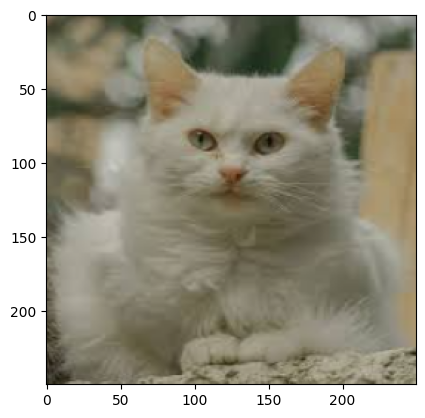

In [10]:
img, label = train_generator.next()
print(img.shape)
plt.imshow(img[1])
plt.show()